In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
#Load data
train_data = pd.read_csv('/Users/leighajarett/Desktop/us_census_full/census_income_learn.csv', header = None)
test_data = pd.read_csv('/Users/leighajarett/Desktop/us_census_full/census_income_test.csv', header = None)
f = open('/Users/leighajarett/Desktop/us_census_full/census_income_metadata.txt', 'r')
print(f.read())
f.close()

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Terran Lane and Ronny Kohavi
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: terran@ecn.purdue.edu, ronnyk@sgi.com for questions.
|
| The data was split into train/test in approximately 2/3, 1/3
| proportions using MineSet's MIndUtil mineset-to-mlc.
|
| Prediction task is to determine the income level for the person
| represented by the record.  Incomes have been binned at the $50K
| level to present a binary classification problem, much like the
| original UCI/ADULT database.  The goal field of this data, however,
| was drawn from the "total person income" field rather than the
| "adjusted gross income" and may, therefore, behave differently than the
| orginal ADULT goal field.
|
| More information detailing the meaning of the attributes can be
| found in http://www.bls.census.gov/cps/cpsmain.htm
| To make use of the data d

In [4]:
#Remove column 24 - "instance weight: ignore" 
iw_train = train_data.ix[:,24]
del train_data[24]

iw_test = test_data.ix[:,24]
del test_data[24]

In [10]:
#Give Column Names
column_names = ['age', 'work_class', 'industry_recode', 'occupation_recode', 'education', 'wage_per_hour', 'currently_in_school', 'marital_status','industry_code','occupation_code', 'race', 'hispanic_origin','sex','member_of_labor_union','reason_for_unemployment','full_or_parttime_status','captial_gains','capital_losses','dividendes_from_stocks','tax_filer_status','region_previous_residence','state_previous_residence','household_and_fam_stat','house_summary_in_household','migration_code_change_msa','migration_code_change_reg','migration_code_move_within_reg','live_this_house_1year','migration_prev_res_sunbelt','num_persons_worked_for_employer','family_members_under_18','country_of_birth_father','country_of_birth_mother','country_of_birth_self','citizenship','own_business_or_self_employed','fill_inc_questionnaire_veterns_admin','veterans_benefits','weeks_worked_in_year','year','income']
train_data.columns =column_names
test_data.columns =column_names

In [19]:
train_data

,age,work_class,industry_recode,occupation_recode,education,wage_per_hour,currently_in_school,marital_status,industry_code,occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_veterns_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [289]:
#Make Labels Binary
Y_train = [] #labels for the training data
Y_test = [] #labels for the testing data

for i in range(0,len(train_data.ix[:,40])):
    if train_data.ix[i,40] == ' - 50000.':
        a = 0
    elif train_data.ix[i,40] ==  ' 50000+.':
        a = 1
    Y_train.extend([a])
    
for i in range(0,len(test_data.ix[:,40])):
    if test_data.ix[i,40] == ' - 50000.':
        a = 0
    elif test_data.ix[i,40] ==  ' 50000+.':
        a = 1
    Y_test.extend([a])

#if less than 50,000 = 0, more than 50,000 = 1

In [5]:
#Investigate Data
age = train_data.ix[:,0]
mean(age), max(age), min(age)

(34.494198663813194, 90, 0)

In [8]:
import matplotlib.pyplot as plt

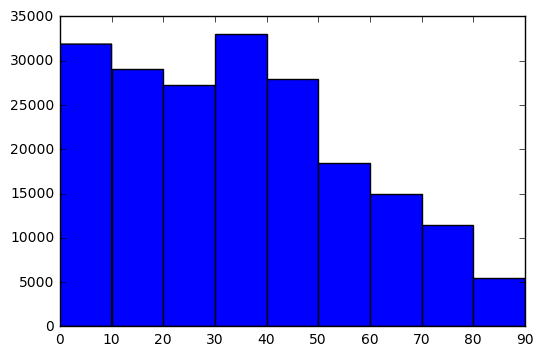

In [11]:
plt.hist([train_data['age']], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.show()

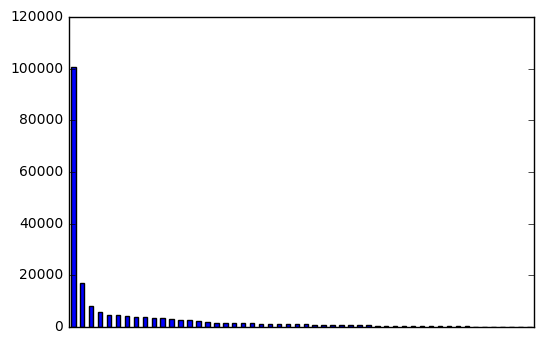

In [13]:
#Industry Code 
pd.Series(train_data['industry_recode'], dtype='category').value_counts().plot(kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') 
plt.show()

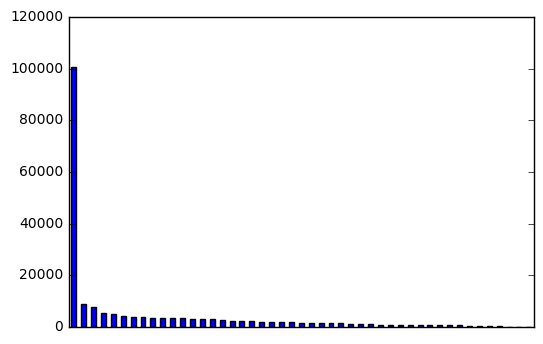

In [20]:
#Occupation Recode 
pd.Series(train_data['occupation_recode'], dtype='category').value_counts().plot(kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') 
plt.show()

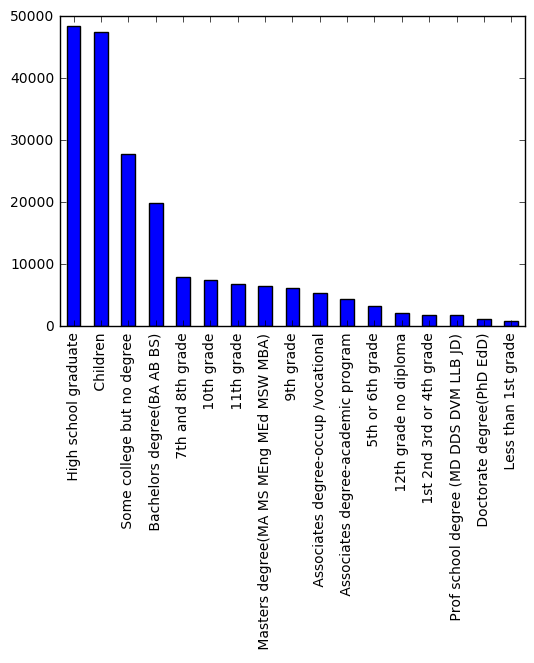

In [40]:
# Education 
plt.show(pd.Series(train_data['education'], dtype='category').value_counts().plot(kind='bar'))

In [39]:
# Wage
wage = train_data['wage_per_hour']
mean(wage), min(wage), max(wage), np.std(wage)

(55.426908175999756, 0, 9999, 274.89576501850644)

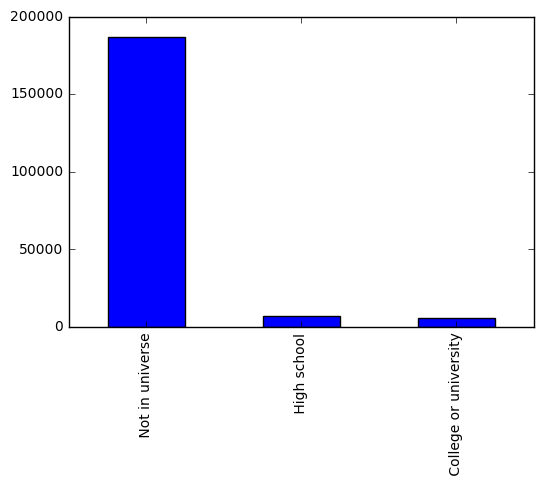

In [38]:
# Currently in School
plt.show(pd.Series(train_data['currently_in_school'], dtype='category').value_counts().plot(kind='bar'))

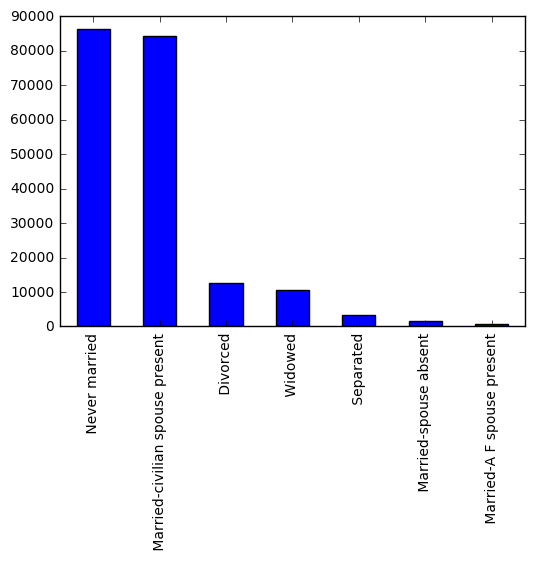

In [37]:
#Marital Status
plt.show(pd.Series(train_data['marital_status'], dtype='category').value_counts().plot(kind='bar'))

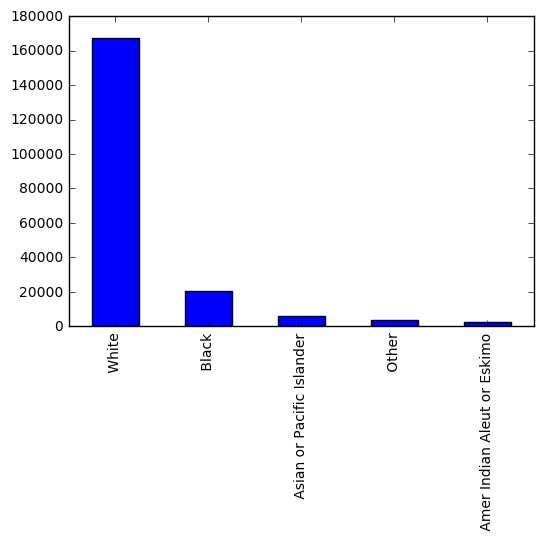

In [41]:
#Race
plt.show(pd.Series(train_data['race'], dtype='category').value_counts().plot(kind='bar'))

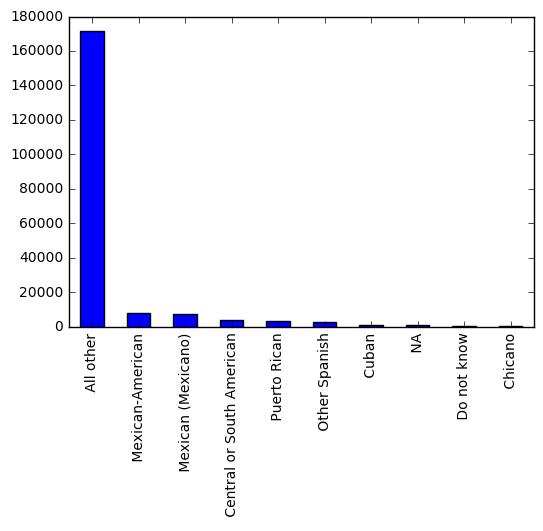

In [42]:
#Hispanic
plt.show(pd.Series(train_data['hispanic_origin'], dtype='category').value_counts().plot(kind='bar'))

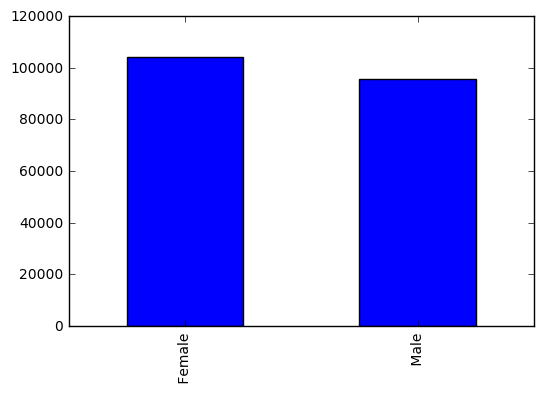

In [43]:
#Sex
plt.show(pd.Series(train_data['sex'], dtype='category').value_counts().plot(kind='bar'))

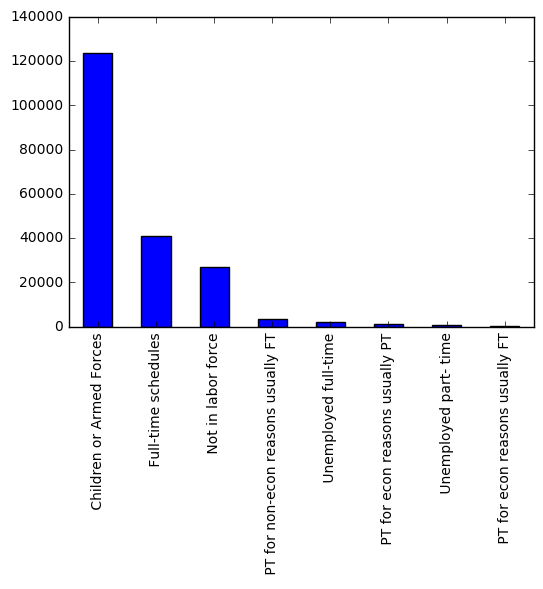

In [44]:
#Full time or part time status
plt.show(pd.Series(train_data['full_or_parttime_status'], dtype='category').value_counts().plot(kind='bar'))

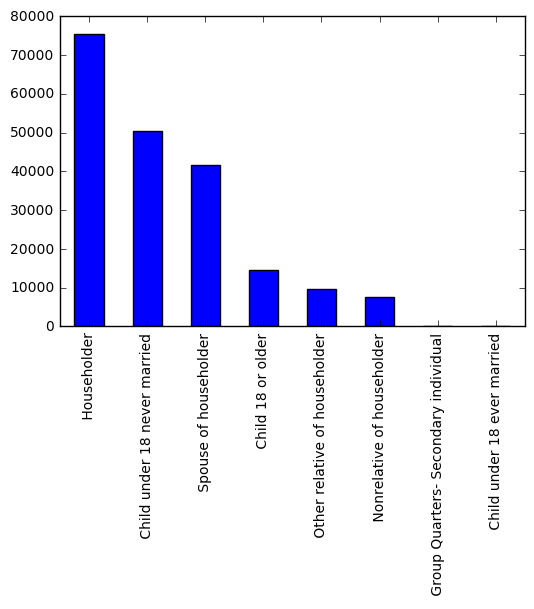

In [45]:
#Household Summary
plt.show(pd.Series(train_data['house_summary_in_household'], dtype='category').value_counts().plot(kind='bar'))

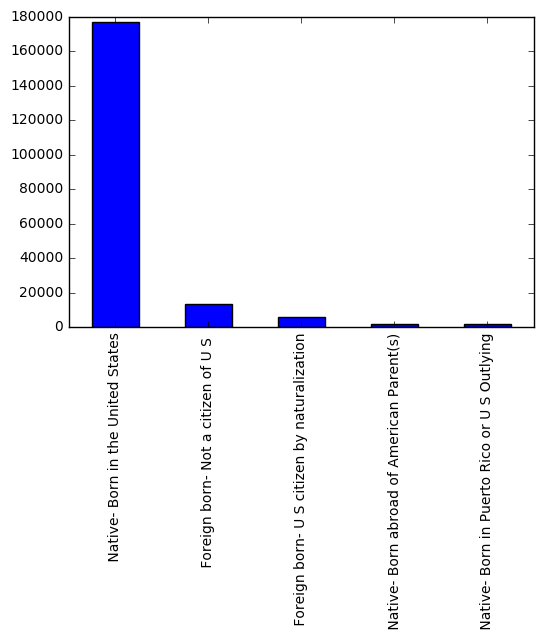

In [46]:
#Citizenship
plt.show(pd.Series(train_data['citizenship'], dtype='category').value_counts().plot(kind='bar'))

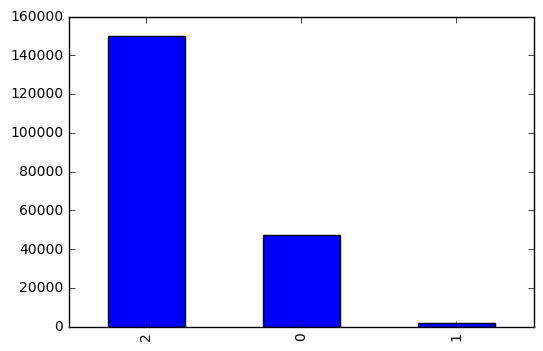

In [47]:
#Veteran Status
plt.show(pd.Series(train_data['veterans_benefits'], dtype='category').value_counts().plot(kind='bar'))

In [48]:
#Weeks worked in the year
weeks = train_data['weeks_worked_in_year']
mean(weeks), min(weeks), max(weeks), np.std(weeks)

(23.174897129654227, 0, 52, 24.411426992815063)

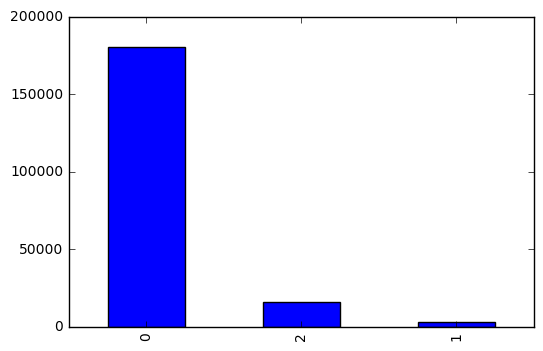

In [49]:
#Own business
plt.show(pd.Series(train_data['own_business_or_self_employed'], dtype='category').value_counts().plot(kind='bar'))

In [56]:
#Making Changes to Data

#Categorize Age
age_cat = []
for i in range(0,len(age)):
        if age[i] < 16:
            age_cat.extend([0])
        elif  16 <= age[i] <= 25:
            age_cat.extend([1])
        elif  26 <= age[i] <= 35:
            age_cat.extend([2])
        elif  36 <= age[i] <= 45:
            age_cat.extend([3]) 
        elif  46 <= age[i] <= 55:
            age_cat.extend([4])
        elif  55 <= age[i] <= 65:
            age_cat.extend([5])
        elif  age[i] > 65:
            age_cat.extend([6])

In [58]:
#Industry Recode
industry_recode = train_data['industry_recode']

In [23]:
#Occupation Recode
occupation_recode = train_data['occupation_recode']

In [26]:
#Make education categorical 
educ = []
for i in range(0,len(age)):
        a = 0
        if train_data.ix[i,4] == ' High school graduate':
            a = 1
        elif train_data.ix[i,4] == ' Some college but no degree':
            a = 2
        elif train_data.ix[i,4] == ' Associates degree-occup /vocational' or train_data.ix[i,4] == ' Associates degree-academic program':
            a = 3
        elif train_data.ix[i,4] == ' Bachelors degree(BA AB BS)':
            a = 4
        elif train_data.ix[i,4] == ' Masters degree(MA MS MEng MEd MSW MBA)':
            a = 5
        elif train_data.ix[i,4] == ' Doctorate degree(PhD EdD)':
            a = 6
        elif train_data.ix[i,4] == ' Prof school degree (MD DDS DVM LLB JD)':
            a = 7
        educ.extend([a])

In [28]:
#Make categorical: still in school?
still_school = []
for i in range(0,len(age)):
        a = 0
        if train_data.ix[i,6] == ' Not in universe':
            a = 1
        still_school.extend([a])
#1 = not in school, 0 = still in school (high school or college)

In [29]:
#Make marital status categorical
marr_stat = []
for i in range(0,len(age)):
        a = 0
        if train_data.ix[i,7] == ' Never married' or  train_data.ix[i,7] == ' Separated' or train_data.ix[i,7] == ' Divorced' or train_data.ix[i,7] == ' Widowed':
            a = 1
        marr_stat.extend([a])
#1 is not married, 0 is married

In [30]:
#Make race categorical
race = []
for i in range(0,len(age)):
        if train_data.ix[i,10] == ' White':
            a = 0
        elif train_data.ix[i,10] == ' Black':
            a = 1
        elif train_data.ix[i,10] == ' Other':
            a = 2
        elif train_data.ix[i,10] == ' Amer Indian Aleut or Eskimo':
            a = 3
        elif train_data.ix[i,10] == ' Asian or Pacific Islander':
            a = 4
        race.extend([a]) 

In [34]:
#Make hispanic categorical
hispan = []
for i in range(0,len(age)):
        a = 0
        if train_data.ix[i,11] == ' All other':
            a = 1
        hispan.extend([a])
#0 is hispanic, 1 is not hispanic

In [35]:
#Make sex categorical 
sex = []
for i in range(0,len(age)):
    a = 1
    if train_data.ix[i,12] == ' Male':
        a = 0
    sex.extend([a])

In [50]:
#Make full or part time status categorical
full_part = []
for i in range(0,len(age)):
    a = 0
    if train_data.ix[i,12] == ' Full-time schedules':
        a =1
    elif train_data.ix[i,12] == ' PT for non-econ reasons usually FT' or train_data.ix[i,12] == ' PT for econ reasons usually PT' or train_data.ix[i,12] == ' PT for econ reasons usually FT':
        a = 2
    full_part.extend([a])
#0 is other, 1 is full time, 2 is part time

In [ ]:
#Wage
#wage = wage

In [36]:
#Make detailed household summary categorical
fam = []
for i in range(0,len(age)):
    if train_data.ix[i,23] == ' Child under 18 never married':
        a = 0
    if train_data.ix[i,23] == ' Other relative of householder':
        a = 1
    if train_data.ix[i,23] == ' Nonrelative of householder':
        a = 2
    if train_data.ix[i,23] == ' Spouse of householder':
        a = 3
    if train_data.ix[i,23] == ' Householder':
        a = 4
    if train_data.ix[i,23] == ' Child under 18 ever married':
        a = 5
    if train_data.ix[i,23] == ' Group Quarters- Secondary individual':
        a= 6
    if train_data.ix[i,23] == ' Child 18 or older':
        a=7
    fam.extend([a])

In [33]:
#Make citizenship categorical
citz = []
for i in range(0,len(age)):
        a = 1
        if train_data.ix[i,34] == ' Foreign born- Not a citizen of U S ':
            a = 0
        citz.extend([a])
#citizen = 1, not citizen = 0

In [51]:
#Veteran status
vet_benefits = train_data.ix[:,37]

In [52]:
#Weeks worked in the year
weeks_worked = train_data.ix[:,38]

In [53]:
#Own business
own_bus = train_data.ix[:,35]

In [54]:
#Compile transformed training data
col_names_new = ['age_cat','occupation_recode','industry_recode','educ','still_school','marr_stat','race','hispan','sex','full_part','wage','fam','citz','vet_benefits','weeks_worked','own_bus']

In [62]:
table = np.column_stack((age_cat,occupation_recode,industry_recode,educ,still_school,marr_stat,race,hispan,sex,full_part,wage,fam,citz,vet_benefits,weeks_worked,own_bus))

In [288]:
X_train = pd.DataFrame(table)
X_train.columns = col_names_new

In [ ]:
#Do same for testing data

In [103]:
#Categorize Age
age_cat_t = []
for i in range(0,len(test_data.ix[:,0])):
        if test_data.ix[i,0] < 16:
            a= 0
        elif  16 <= test_data.ix[i,0] <= 25:
            a= 1
        elif  26 <= test_data.ix[i,0] <= 35:
            a= 2
        elif  36 <= test_data.ix[i,0] <= 45:
            a= 3
        elif  46 <= test_data.ix[i,0] <= 55:
            a= 4
        elif  55 <= test_data.ix[i,0] <= 65:
            a= 5
        elif  test_data.ix[i,0] > 65:
            a= 6
        age_cat_t.extend([a])

In [72]:
#Industry Recode
industry_recode_t = test_data['industry_recode']

In [73]:
#Occupation Recode
occupation_recode_t = test_data['occupation_recode']

In [74]:
#Make education categorical 
educ_t = []
for i in range(0,len(test_data.ix[:,0])):
        a = 0
        if test_data.ix[i,4] == ' High school graduate':
            a = 1
        elif test_data.ix[i,4] == ' Some college but no degree':
            a = 2
        elif test_data.ix[i,4] == ' Associates degree-occup /vocational' or train_data.ix[i,4] == ' Associates degree-academic program':
            a = 3
        elif test_data.ix[i,4] == ' Bachelors degree(BA AB BS)':
            a = 4
        elif test_data.ix[i,4] == ' Masters degree(MA MS MEng MEd MSW MBA)':
            a = 5
        elif test_data.ix[i,4] == ' Doctorate degree(PhD EdD)':
            a = 6
        elif test_data.ix[i,4] == ' Prof school degree (MD DDS DVM LLB JD)':
            a = 7
        educ_t.extend([a])

In [75]:
#Make categorical: still in school?
still_school_t = []
for i in range(0,len(test_data.ix[:,0])):
        a = 0
        if test_data.ix[i,6] == ' Not in universe':
            a = 1
        still_school_t.extend([a])
#1 = not in school, 0 = still in school (high school or college)

In [76]:
#Make marital status categorical
marr_stat_t = []
for i in range(0,len(test_data.ix[:,0])):
        a = 0
        if test_data.ix[i,7] == ' Never married' or  train_data.ix[i,7] == ' Separated' or train_data.ix[i,7] == ' Divorced' or train_data.ix[i,7] == ' Widowed':
            a = 1
        marr_stat_t.extend([a])
#1 is not married, 0 is married

In [77]:
#Make race categorical
race_t = []
for i in range(0,len(test_data.ix[:,0])):
        if test_data.ix[i,10] == ' White':
            a = 0
        elif test_data.ix[i,10] == ' Black':
            a = 1
        elif test_data.ix[i,10] == ' Other':
            a = 2
        elif test_data.ix[i,10] == ' Amer Indian Aleut or Eskimo':
            a = 3
        elif test_data.ix[i,10] == ' Asian or Pacific Islander':
            a = 4
        race_t.extend([a]) 

In [78]:
#Make hispanic categorical
hispan_t = []
for i in range(0,len(test_data.ix[:,0])):
        a = 0
        if test_data.ix[i,11] == ' All other':
            a = 1
        hispan_t.extend([a])
#0 is hispanic, 1 is not hispanic

In [80]:
#Make sex categorical 
sex_t = []
for i in range(0,len(test_data.ix[:,0])):
    a = 1
    if test_data.ix[i,12] == ' Male':
        a = 0
    sex_t.extend([a])

In [81]:
full_part_t = []
for i in range(0,len(test_data.ix[:,0])):
    a = 0
    if test_data.ix[i,12] == ' Full-time schedules':
        a =1
    elif test_data.ix[i,12] == ' PT for non-econ reasons usually FT' or train_data.ix[i,12] == ' PT for econ reasons usually PT' or train_data.ix[i,12] == ' PT for econ reasons usually FT':
        a = 2
    full_part_t.extend([a])
#0 is other, 1 is full time, 2 is part time

In [82]:
#Make detailed household summary categorical
fam_t = []
for i in range(0,len(test_data.ix[:,0])):
    if test_data.ix[i,23] == ' Child under 18 never married':
        a = 0
    if test_data.ix[i,23] == ' Other relative of householder':
        a = 1
    if test_data.ix[i,23] == ' Nonrelative of householder':
        a = 2
    if test_data.ix[i,23] == ' Spouse of householder':
        a = 3
    if test_data.ix[i,23] == ' Householder':
        a = 4
    if test_data.ix[i,23] == ' Child under 18 ever married':
        a = 5
    if test_data.ix[i,23] == ' Group Quarters- Secondary individual':
        a= 6
    if test_data.ix[i,23] == ' Child 18 or older':
        a=7
    fam_t.extend([a])

In [83]:
#Make citizenship categorical
citz_t = []
for i in range(0,len(test_data.ix[:,0])):
        a = 1
        if test_data.ix[i,34] == ' Foreign born- Not a citizen of U S ':
            a = 0
        citz_t.extend([a])
#citizen = 1, not citizen = 0

In [84]:
#Veteran status
vet_benefits_t = test_data.ix[:,37]

In [88]:
#Wage per hour
wage_t = test_data['wage_per_hour']

In [85]:
#Weeks worked in the year
weeks_worked_t = test_data.ix[:,38]

In [86]:
#Own business
own_bus_t = test_data.ix[:,35]

In [104]:
table_t = np.column_stack((age_cat_t,occupation_recode_t,industry_recode_t,educ_t,still_school_t,marr_stat_t,race_t,hispan_t,sex_t,full_part_t,wage_t,fam_t,citz_t,vet_benefits_t,weeks_worked_t,own_bus_t))

In [287]:
X_test = pd.DataFrame(table_t)
X_test.columns = col_names_new

In [106]:
#Split training into 3-fold cross validation groups 
cv_idx = np.random.randint(0,len(X_train), size = len(X_train))
cv1 = X_train.ix[cv_idx[0:66507],]
cv2 = X_train.ix[cv_idx[66508:133015],]
cv3 = X_train.ix[cv_idx[133016:199523],]
cv1_labs = [Y_train[i] for i in cv_idx[0:66507]]
cv2_labs = [Y_train[i] for i in cv_idx[66508:133015]]
cv3_labs = [Y_train[i] for i in cv_idx[133016:199523]]

In [353]:
#Logistic Regression

#Get coefficients
def get_coefs(X_train, Y_train, learn_r, N):
    b = np.zeros(len(X_train.columns)) #b is array of coef. start with all 0
    for n in range(N): #N iterations
        y_i = np.dot(X_train,b)  
        y_i = 1 / (1 + exp(-y_i)) #sigmoid function
        error =  y_i - Y_train 
        gradient = np.dot(X_train.T,error)/X_train.shape[0]
        b = b -learn_r*gradient #update coefs with gradient
    return b

In [336]:
def predict(X_test, b): #predict labels
    y_i = np.dot(X_test,b) 
    y_i = 1 / (1 + exp(-y_i))
    for i in range(len(y_i)):
        y_i[i] = round(y_i[i]) #round to 0 or 1
    return y_i

In [343]:
def log_reg(X_train, Y_train, X_test, learn_r, N):
    b = get_coefs(X_train, Y_train, learn_r, N)
    y_i = predict(X_test, b)
    return y_i   #put it together in one function

In [363]:
#Accuracy function
def accuracy(predic_label,actual_label): 
    good = 0
    for i in range(0,len(predic_label)):
        if predic_label[i] == actual_label[i]:
            good =good+1  #if labels match then good gets a 1, if not good gets a 0
        else:
            good =good+0
    return(good/len(predic_label))

In [354]:
#Cross Validation
#Round 1: train on cv1 and cv2, test on cv3
N = 100
learn_r = .1
X_train1 = pd.DataFrame.reset_index(cv1.append(cv2)) #get rid of index column
X_train1_indices = X_train1['index']
del X_train1['index']
Y_train1 = np.hstack((cv1_labs,cv2_labs))
X_test1 = cv3
Y_test1 = cv3_labs
predictions1 = log_reg(X_train1, Y_train1, X_test1, learn_r, N)
acc1 = accuracy(predictions1, Y_test1)
acc1

0.9379313455726465

In [355]:
#Round 2: train on cv2 and cv3, test on cv1
X_train2 = pd.DataFrame.reset_index(cv2.append(cv3))
X_train2_indices = X_train2['index']
del X_train2['index']
Y_train2 = np.hstack((cv2_labs,cv3_labs))
X_test2 = cv1
Y_test2 = cv1_labs
predictions_2 = log_reg(X_train2, Y_train2, X_test2, learn_r, N)
acc2 = accuracy(predictions_2, Y_test2)
acc2

0.884598613679763

In [356]:
#Round 3: train on cv3 and cv1, test on cv2
X_train3 = pd.DataFrame.reset_index(cv3.append(cv1))
X_train3_indices = X_train3['index']
del X_train3['index']
Y_train3 = np.hstack((cv3_labs,cv1_labs))
X_test3 = cv2
Y_test3 = cv2_labs
predictions_3 = log_reg(X_train3, Y_train3, X_test3, .1, 100)
#b_3 = results['b']
#b0_3 = results['b0']
#predictions_3 = results['predictions']
acc3 = accuracy(predictions_3, Y_test3)
acc3

0.9357360879305938

In [359]:
#Get average accuracy and average coefficients 
acc_cv = (acc1+acc2+acc3)/3
acc_cv

0.9194220157276677

In [360]:
#Train model on whole training data and test on testing data
predictions = log_reg(X_train, Y_train, X_test, .1, 100)

In [361]:
#Get accuracy 
accuracy(predictions, Y_test)

0.9379723742507167

In [368]:
#Get true pos, true neg, false pos, false neg
def conf_matrix(predic_label,actual_label): 
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    for i in range(len(predic_label)):
        if predic_label[i] == 1:
            if actual_label[i] == 1:
                TP = TP +1
            elif actual_label[i] == 0:
                FP = FP +1
        elif predic_label[i] == 0:
            if actual_label[i] ==1:
                FN = FN +1
            elif actual_label[i] ==0:
                TN = TN +1
    return TN, FP, FN, TP

In [369]:
conf_matrix(predictions, Y_test)

(93574, 2, 6186, 0)

In [378]:
b = get_coefs(X_train, Y_train, .1, 100)

In [382]:
abs(b).argsort()

array([ 9, 15,  0,  6, 13, 14, 11,  3,  2,  7,  8,  4, 12,  5,  1, 10])

In [383]:
X_train.columns[9]

'full_part'

In [384]:
X_train.columns[15]

'own_bus'

In [385]:
X_train.columns[0]

'age_cat'

In [386]:
X_train.columns[6]

'race'

In [387]:
X_train.columns[13]

'vet_benefits'

In [389]:
from sklearn import tree

In [390]:
#Try with a decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
labels2 = clf.predict(X_test)

In [392]:
accuracy(labels2, Y_test)

0.9321485134620396

In [393]:
conf_matrix(labels2, Y_test)

(90752, 2824, 3945, 2241)